<a href="https://colab.research.google.com/github/Ahtesham-Ibne-Mostafa/Data_Genesis/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Summer 2025/CSE437/Lecture on Data Cleaning/flawed_dataset.csv')
df.head()

,ID,Name,Age,Gender,Email,Join_Date,Salary,Department,Feedback_Score,Left_Company
0,353,BOB,999.0,f,NaN,2021-01-01,1000000.0,NaN,2.5,N
1,690,NaN,-5.0,FEMALE,NaN,NaN,33020.0,NaN,10.0,No
2,486,eve,-5.0,F,invalid-email,2020-05-30,NaN,hr,NaN,NaN
3,389,Alice,-5.0,male,NaN,2021-01-01,1000000.0,FIN,NaN,0
4,32,BOB,-5.0,m,user131@example.com,2021-01-01,NaN,NaN,NaN,Y


In [ ]:
df.shape

(1050, 10)

In [ ]:
initial_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1050 non-null   int64  
 1   Name            886 non-null    object 
 2   Age             792 non-null    float64
 3   Gender          905 non-null    object 
 4   Email           527 non-null    object 
 5   Join_Date       610 non-null    object 
 6   Salary          774 non-null    float64
 7   Department      878 non-null    object 
 8   Feedback_Score  799 non-null    float64
 9   Left_Company    918 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 82.2+ KB


In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
ID,0
Name,164
Age,258
Gender,145
Email,523
Join_Date,440
Salary,276
Department,172
Feedback_Score,251
Left_Company,132


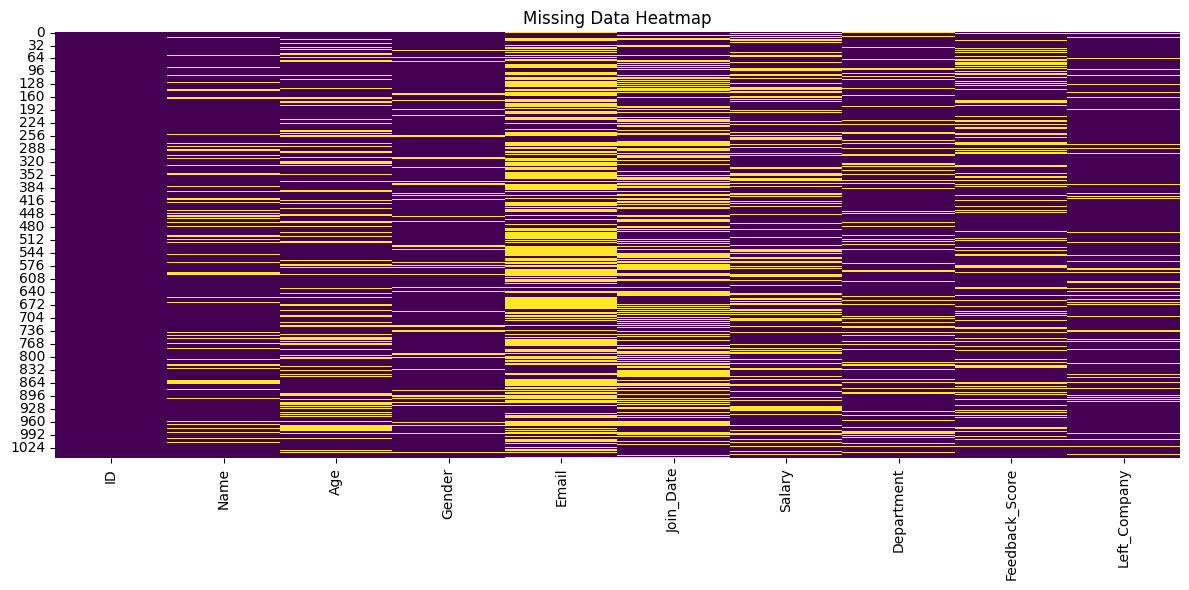

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# Remove exact duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df['Gender'].unique()

array(['female', 'male', nan], dtype=object)

In [ ]:
df['Gender'] = df['Gender'].str.lower().str.strip()
df['Gender'] = df['Gender'].replace({'f': 'female', 'm': 'male'})
df['Gender']

,Gender
0,female
1,female
2,female
3,male
4,male
...,...
1044,male
1045,NaN
1046,female
1047,NaN


In [ ]:
df['Department'].unique()

array([nan, 'Human Resources', 'Finance', 'Engineering', 'ENGINEERING',
       'FINANCE'], dtype=object)

In [ ]:
df['Department'] = df['Department'].str.upper().str.strip()
df['Department'] = df['Department'].replace({'HR': 'Human Resources', 'ENG': 'Engineering', 'FIN': 'Finance'})
df['Department']

,Department
0,NaN
1,NaN
2,Human Resources
3,Finance
4,NaN
...,...
1044,ENGINEERING
1045,FINANCE
1046,ENGINEERING
1047,Engineering


In [ ]:
df['Left_Company'].unique()

array([ 0., nan,  1.])

In [ ]:
df['Left_Company'] = df['Left_Company'].astype(str).str.lower().str.strip()
df['Left_Company'] = df['Left_Company'].replace({'yes': 1, 'y': 1, '1': 1, 'no': 0, 'n': 0, '0': 0})
df['Left_Company'] = df['Left_Company'].astype('float')
df['Left_Company']

,Left_Company
0,0.0
1,0.0
2,NaN
3,0.0
4,1.0
...,...
1044,1.0
1045,NaN
1046,1.0
1047,0.0


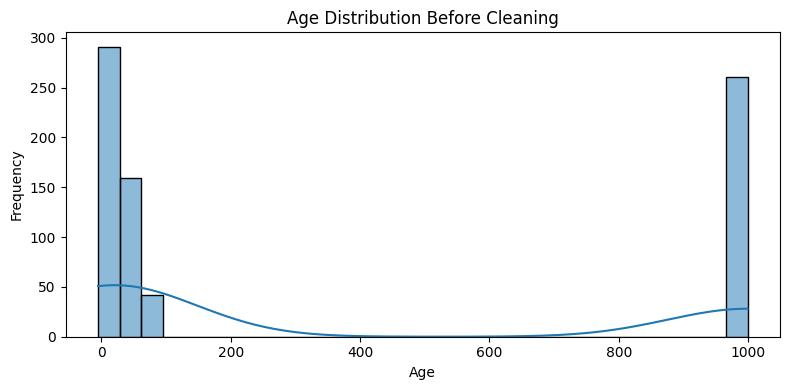

(np.float64(31.0),
 np.float64(56.0),
 np.float64(25.0),
 np.float64(-6.5),
 np.float64(93.5))

In [ ]:
# Plotting a histogram of Age to visualize distribution before cleaning
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution Before Cleaning")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Drop missing or clearly invalid ages temporarily to compute IQR
valid_ages = df['Age'].dropna()
valid_ages = valid_ages[valid_ages.between(0, 100)]  # quick fix to ignore impossible values

# Calculate IQR
Q1 = valid_ages.quantile(0.25)
Q3 = valid_ages.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print IQR info
(Q1, Q3, IQR, lower_bound, upper_bound)


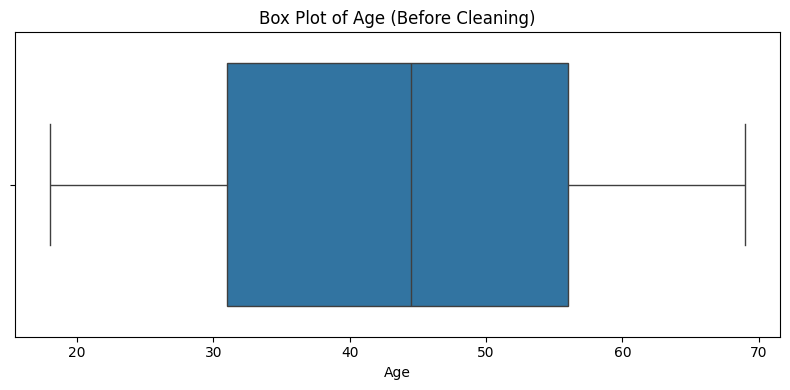

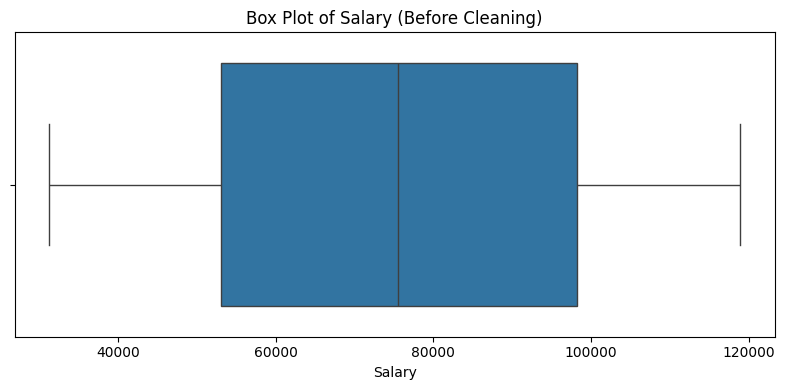

((np.float64(31.0),
  np.float64(56.0),
  np.float64(25.0),
  np.float64(-6.5),
  np.float64(93.5)),
 (np.float64(53127.5),
  np.float64(98143.0),
  np.float64(45015.5),
  np.float64(-14395.75),
  np.float64(165666.25)))

In [ ]:
# Create box plot for Age
plt.figure(figsize=(8, 4))
sns.boxplot(x=valid_ages)
plt.title("Box Plot of Age (Before Cleaning)")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

# Prepare Salary column for IQR analysis (remove clearly invalid entries)
valid_salaries = df['Salary'].dropna()
valid_salaries = valid_salaries[valid_salaries.between(10000, 200000)]  # realistic range

# Calculate IQR for Salary
Q1_salary = valid_salaries.quantile(0.25)
Q3_salary = valid_salaries.quantile(0.75)
IQR_salary = Q3_salary - Q1_salary
lower_salary = Q1_salary - 1.5 * IQR_salary
upper_salary =
 + 1.5 * IQR_salary

# Box plot for Salary
plt.figure(figsize=(8, 4))
sns.boxplot(x=valid_salaries)
plt.title("Box Plot of Salary (Before Cleaning)")
plt.xlabel("Salary")
plt.tight_layout()
plt.show()

# Return IQR details for both columns
(Q1, Q3, IQR, lower_bound, upper_bound), (Q1_salary, Q3_salary, IQR_salary, lower_salary, upper_salary)


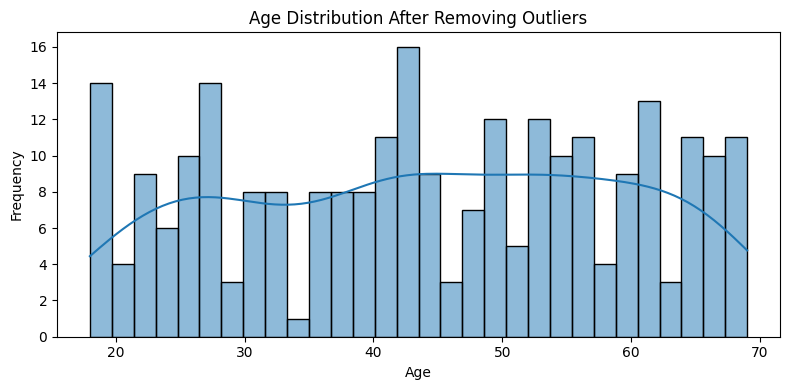

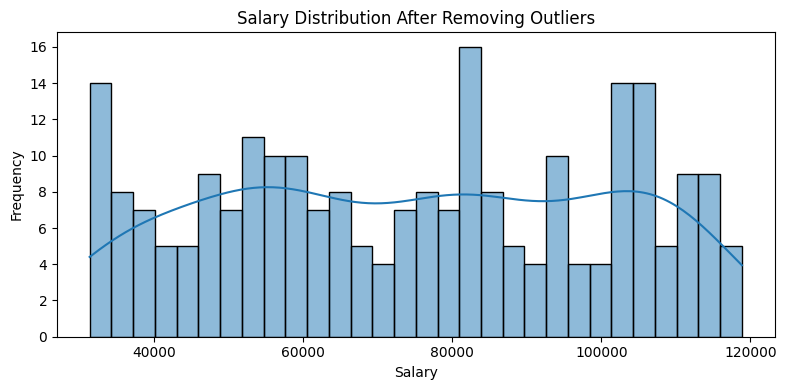

,0
Age,742
Salary,761


In [ ]:
# Remove outliers in Age based on IQR bounds
df['Age'] = df['Age'].apply(lambda x: np.nan if pd.isna(x) or x < 0 or x > 90 else x)

# Remove outliers in Salary based on IQR bounds
df['Salary'] = df['Salary'].apply(lambda x: np.nan if pd.isna(x) or x < 10000 or x > 161384.25 else x)

# Visualize cleaned Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution After Removing Outliers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Visualize cleaned Salary distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Salary'].dropna(), bins=30, kde=True)
plt.title("Salary Distribution After Removing Outliers")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Show how many rows were affected
df[['Age', 'Salary']].isnull().sum()


In [ ]:
df['Join_Date'] = pd.to_datetime(df['Join_Date'], errors='coerce')


In [ ]:
df['Email'] = df['Email'].fillna('').str.strip()
df['Email_Valid'] = df['Email'].str.contains(r'^[\w\.-]+@[\w\.-]+\.\w+$')
df.loc[~df['Email_Valid'], 'Email'] = np.nan  # Invalidate incorrect formats
df.drop(columns=['Email_Valid'], inplace=True)

In [ ]:
df['Name'].fillna('Unknown', inplace=True)
df['Department'].fillna('Unknown', inplace=True)
df['Gender'].fillna('unknown', inplace=True)

/tmp/ipython-input-22-3873457056.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Name'].fillna('Unknown', inplace=True)
/tmp/ipython-input-22-3873457056.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

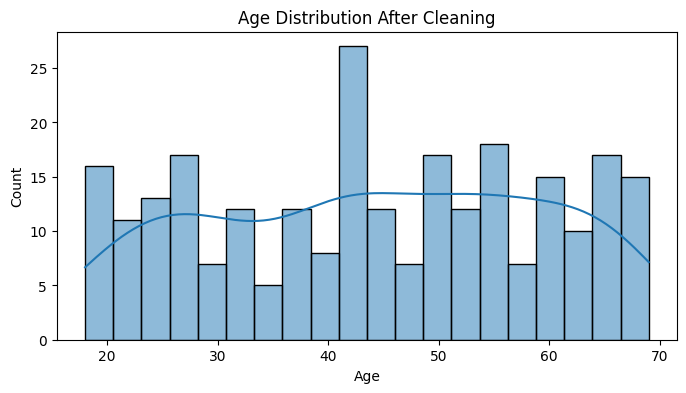

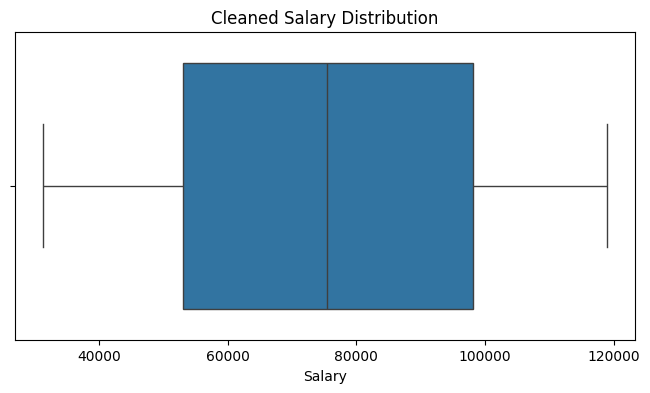

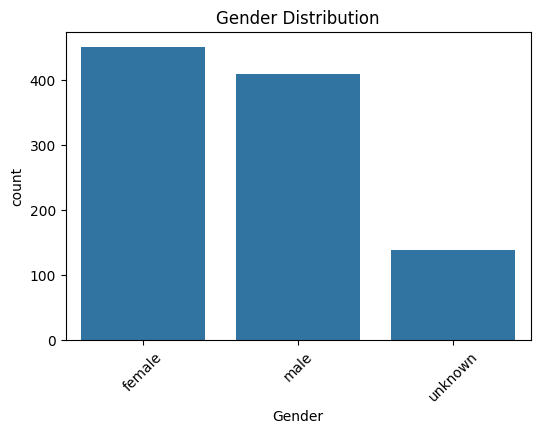

In [ ]:
# Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution After Cleaning")
plt.show()

# Salary boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Salary'])
plt.title("Cleaned Salary Distribution")
plt.show()

# Gender counts
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1049
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              1000 non-null   int64         
 1   Name            1000 non-null   object        
 2   Age             258 non-null    float64       
 3   Gender          1000 non-null   object        
 4   Email           261 non-null    object        
 5   Join_Date       397 non-null    datetime64[ns]
 6   Salary          239 non-null    float64       
 7   Department      1000 non-null   object        
 8   Feedback_Score  763 non-null    float64       
 9   Left_Company    873 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 85.9+ KB


,ID,Name,Age,Gender,Email,Join_Date,Salary,Department,Feedback_Score,Left_Company
count,1000.000000,1000,258.000000,1000,261,397,239.000000,1000,763.000000,873.000000
unique,NaN,7,NaN,3,149,NaN,NaN,6,NaN,NaN
top,NaN,Unknown,NaN,female,user93@example.com,NaN,NaN,Human Resources,NaN,NaN
freq,NaN,153,NaN,451,5,NaN,NaN,287,NaN,NaN
mean,500.500000,NaN,44.124031,NaN,NaN,2020-09-16 08:38:41.410579456,74574.912134,NaN,4.217038,0.517755
min,1.000000,NaN,18.000000,NaN,NaN,2020-05-30 00:00:00,31342.000000,NaN,0.000000,0.000000
25%,250.750000,NaN,31.000000,NaN,NaN,2020-05-30 00:00:00,53127.500000,NaN,0.000000,0.000000
50%,500.500000,NaN,44.500000,NaN,NaN,2021-01-01 00:00:00,75500.000000,NaN,3.000000,1.000000
75%,750.250000,NaN,56.000000,NaN,NaN,2021-01-01 00:00:00,98143.000000,NaN,10.000000,1.000000
max,1000.000000,NaN,69.000000,NaN,NaN,2021-01-01 00:00:00,118861.000000,NaN,10.000000,1.000000


In [ ]:
# 1. Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# 2. Fill missing Salary with department-wise median
df['Salary'] = df.groupby('Department')['Salary'].transform(lambda x: x.fillna(x.median()))

# 3. Option A: Keep email column and mark presence
#df['Has_Email'] = df['Email'].notnull().astype(int)

# Option B: Drop email column if not needed
df.drop(columns=['Email'], inplace=True)

# 4. Fill Join_Date with a placeholder date
df['Join_Date'].fillna(pd.Timestamp('2000-01-01'), inplace=True)

# 5. Fill Feedback_Score with median
df['Feedback_Score'].fillna(df['Feedback_Score'].median(), inplace=True)

# 6. Fill Left_Company with most frequent value
df['Left_Company'].fillna(df['Left_Company'].mode()[0], inplace=True)

# Optional: Verify all nulls are gone
print("Missing values after cleaning:\n")
print(df.isnull().sum())


Missing values after cleaning:

ID                0
Name              0
Age               0
Gender            0
Join_Date         0
Salary            0
Department        0
Feedback_Score    0
Left_Company      0
dtype: int64


/tmp/ipython-input-25-2166417299.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-25-2166417299.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)